The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


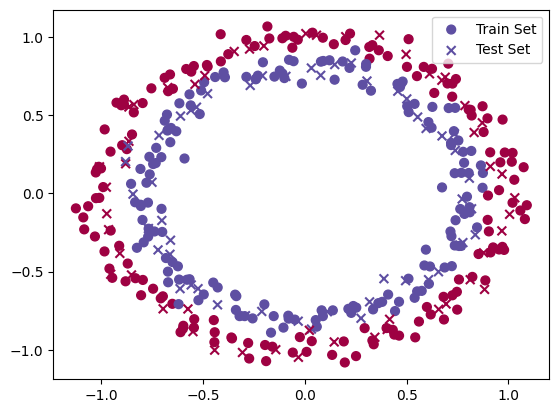

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn 
import sklearn.datasets
import usr_func

%load_ext autoreload
%autoreload 2

x_train, y_train, x_test, y_test = usr_func.load_dataset()

plt.scatter(x_train[0, :], x_train[1, :], c=y_train, s=40, cmap=plt.cm.Spectral, marker='o', label='Train Set')
plt.scatter(x_test[0, :], x_test[1, :], c=y_test, s=40, cmap=plt.cm.Spectral, marker='x', label='Test Set')
plt.legend()
plt.show()


Cost after iteration 0: 0.8830537463419761
Cost after iteration 1000: 0.6879825919728063
Cost after iteration 2000: 0.6751286264523371
Cost after iteration 3000: 0.6526117768893807
Cost after iteration 4000: 0.6082958970572937
Cost after iteration 5000: 0.5304944491717495
Cost after iteration 6000: 0.41386458170717944
Cost after iteration 7000: 0.31178034648444414
Cost after iteration 8000: 0.23696215330322556
Cost after iteration 9000: 0.18597287209206836
Cost after iteration 10000: 0.1501555628037181
Cost after iteration 11000: 0.12325079292273546
Cost after iteration 12000: 0.09917746546525932
Cost after iteration 13000: 0.08457055954024277
Cost after iteration 14000: 0.07357895962677367


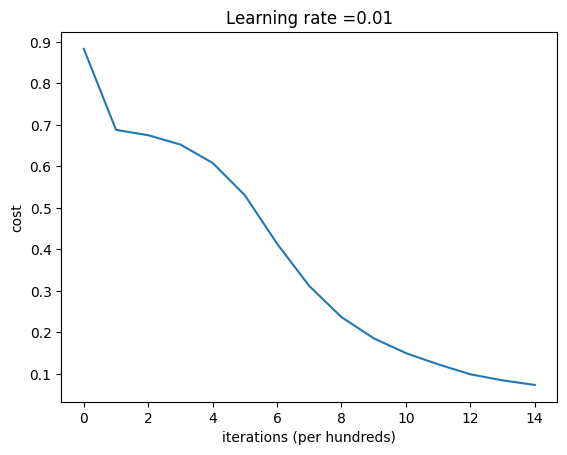

Accuracy: 0.9933333333333333
Accuracy: 0.96


C:\Users\nq9093\AppData\Local\Temp\ipykernel_25472\2443499590.py:76: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  plt.scatter(xx, yy, Z, cmap=plt.cm.get_cmap("Spectral", 2), alpha=.5)
C:\Users\nq9093\AppData\Local\Temp\ipykernel_25472\2443499590.py:76: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(xx, yy, Z, cmap=plt.cm.get_cmap("Spectral", 2), alpha=.5)
C:\Users\nq9093\AppData\Local\Temp\ipykernel_25472\2443499590.py:77: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  plt.scatter(x_train[0, :], x_train[1, :], c=y_train, s=40, cmap=plt.cm.get_cmap("Spectral", 2), marker='o', label='Train Se

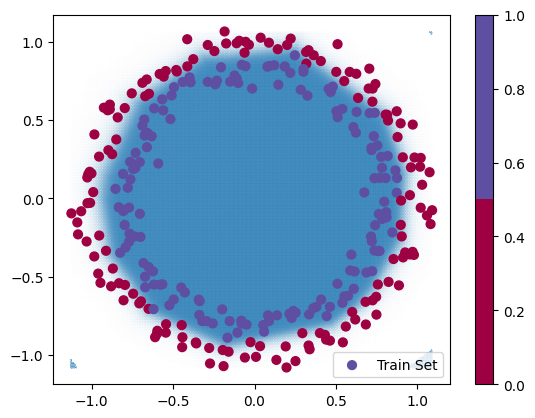

In [30]:
def model(X, Y, learning_rate=.01, num_iterations=15000, print_cost=True, initialization="he"): 
    grads = {}
    costs = []
    m = X.shape[1]
    layers_dims = [X.shape[0], 10, 5, 1]
    
    if initialization == "zeros":
        parameters = initialize_parameters_zeros(layers_dims)
    elif initialization == "random":
        parameters = initialize_parameters_random(layers_dims)
    elif initialization == "he":
        parameters = initialize_parameters_he(layers_dims)
    
    for i in range(0, num_iterations):
        a3, cache = usr_func.forward_propagation(X, parameters)
        cost = usr_func.compute_loss(a3, Y)
        grads = usr_func.backward_propagation(X, Y, cache)
        parameters = usr_func.update_parameters(parameters, grads, learning_rate)
        
        if print_cost and i % 1000 == 0:
            print("Cost after iteration {}: {}".format(i, cost))
            costs.append(cost)
    
    plt.plot(costs)
    plt.ylabel('cost')
    plt.xlabel('iterations (per hundreds)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()
    
    return parameters

def initialize_parameters_zeros(layers_dims): 
    parameters = {}
    L = len(layers_dims)
    
    for l in range(1, L):
        parameters['W' + str(l)] = np.zeros((layers_dims[l], layers_dims[l-1]))
        parameters['b' + str(l)] = np.zeros((layers_dims[l], 1))
    
    return parameters

def initialize_parameters_random(layers_dims):
    np.random.seed(3)
    parameters = {}
    L = len(layers_dims)
    
    for l in range(1, L):
        parameters['W' + str(l)] = np.random.randn(layers_dims[l], layers_dims[l-1]) * 10
        parameters['b' + str(l)] = np.zeros((layers_dims[l], 1))
    
    return parameters

def initialize_parameters_he(layers_dims):
    np.random.seed(3)
    parameters = {}
    L = len(layers_dims)
    
    for l in range(1, L):
        parameters['W' + str(l)] = np.random.randn(layers_dims[l], layers_dims[l-1]) * np.sqrt(2/layers_dims[l-1])
        parameters['b' + str(l)] = np.zeros((layers_dims[l], 1))* np.sqrt(2/layers_dims[l-1])
    
    return parameters

parameters = model(x_train, y_train, initialization="he")
prediction_train = usr_func.predict(x_train, y_train, parameters)
prediction_test = usr_func.predict(x_test, y_test, parameters)


x_min, x_max = x_train[0, :].min(), x_train[0, :].max()
y_min, y_max = x_train[1, :].min(), x_train[1, :].max()
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
xv, yv = xx.ravel(), yy.ravel()
grid = np.stack((xv, yv), axis=1)
Z = usr_func.forward_propagation(grid.T, parameters)[0]
Z = Z.reshape(xx.shape)
plt.scatter(xx, yy, Z, cmap=plt.cm.get_cmap("Spectral", 2), alpha=.5)
plt.scatter(x_train[0, :], x_train[1, :], c=y_train, s=40, cmap=plt.cm.get_cmap("Spectral", 2), marker='o', label='Train Set')
plt.colorbar()
plt.legend()
plt.show()

In [20]:
grid.shape
Z.shape

(415, 422)